In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

train_dir =('.//Train')
val_dir =('.//Test')

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')

])


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Huấn luyện mô hình
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)


# Đánh giá mô hình trên tập kiểm tra (nếu có tập kiểm tra riêng)
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")

# Lưu mô hình
model.save('tool_recognition_model.h5')

Found 2774 images belonging to 6 classes.
Found 1080 images belonging to 6 classes.


D:\DACN_3\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.1766 - loss: 1.8614

D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 49s 552ms/step - accuracy: 0.1771 - loss: 1.8602 - val_accuracy: 0.2722 - val_loss: 1.7548
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 22s 249ms/step - accuracy: 0.3102 - loss: 1.6297 - val_accuracy: 0.3741 - val_loss: 1.8961
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.3571 - loss: 1.5289 - val_accuracy: 0.3972 - val_loss: 1.9682
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.3752 - loss: 1.4435 - val_accuracy: 0.4528 - val_loss: 1.9072
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - accuracy: 0.4150 - loss: 1.4286 - val_accuracy: 0.4667 - val_loss: 1.9310
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.4917 - loss: 1.2525 - val_accuracy: 0.4963 - val_loss: 2.3431
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.5201 - loss: 1.1779 - val_accuracy: 0.5417 - val_loss: 2.7594
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.4959 - loss: 1.2153 - val_accuracy: 0.525

Độ chính xác trên tập kiểm tra: 76.02%


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define data directories (adjust paths as needed)
train_dir = './Train'
val_dir = './Test'

# Create data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Flow data from directories with class mode set to 'categorical'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Load the MobileNet base model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Create the top model using Functional API
inputs = Input(shape=(128, 128, 3))  # Define the input layer

# Pass the input through the base model
x = base_model(inputs)

# Add additional layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model for training
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

# Evaluate the model on the validation set
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")

# Save the trained model
model.save('tool_recognition_model_mobilenet.h5')

Found 2774 images belonging to 6 classes.
Found 1080 images belonging to 6 classes.
Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.6358 - loss: 1.6513 - val_accuracy: 0.8241 - val_loss: 0.5164
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.7961 - loss: 0.5229 - val_accuracy: 0.8556 - val_loss: 0.7783
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.8420 - loss: 0.4160 - val_accuracy: 0.8787 - val_loss: 0.6120
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.8504 - loss: 0.3830 - val_accuracy: 0.8889 - val_loss: 0.9557
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.8675 - loss: 0.4037 - val_accuracy: 0.8917 - val_loss: 0.7997
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.8879 - loss: 0.3584 - val_accuracy: 0.8926 - val_loss: 0.8454
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.8897 - loss: 0.3239 - val_accuracy: 0.9019 - val_loss: 0.6480
Epoch 8/50
87

Độ chính xác trên tập kiểm tra: 92.69%


Model Summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_128 (Functional)      │ (None, 4, 4, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,523,028 (36.33 MB)

 Trainable params: 2,098,054 (8.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 4,196,110 (16.01 MB)

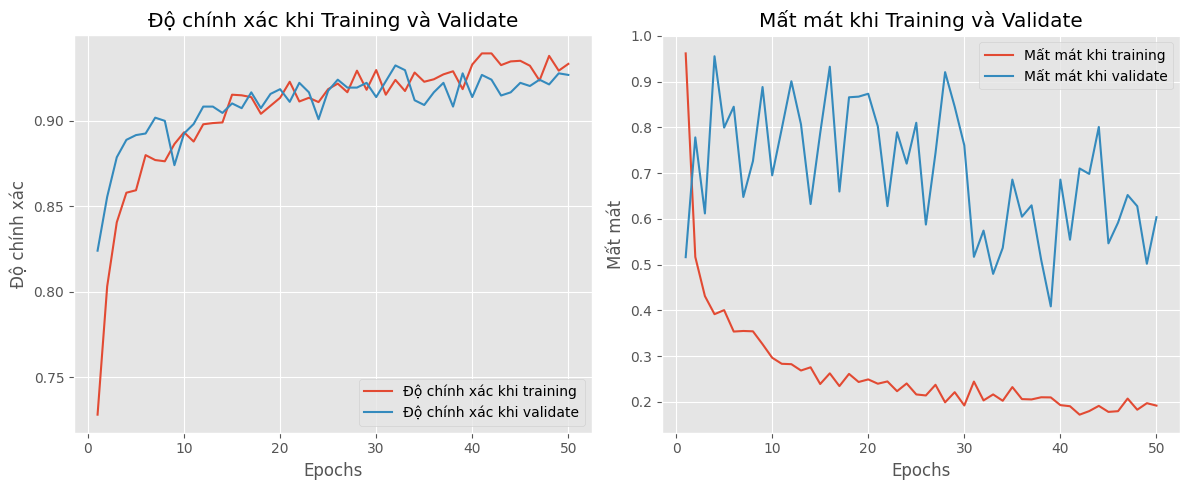

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# In tóm tắt kiến trúc mô hình
print("Model Summary:")
model.summary()

# Trích xuất thông tin từ history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = len(history.history["loss"])
epochs_range = range(1, num_epochs + 1)

# Thiết lập phong cách ggplot
plt.style.use("ggplot")

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))

# Biểu đồ độ chính xác
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Độ chính xác khi training')
plt.plot(epochs_range, val_acc, label='Độ chính xác khi validate')
plt.title('Độ chính xác khi Training và Validate')
plt.xlabel('Epochs')
plt.ylabel('Độ chính xác')
plt.legend()

# Biểu đồ hàm mất mát
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Mất mát khi training')
plt.plot(epochs_range, val_loss, label='Mất mát khi validate')
plt.title('Mất mát khi Training và Validate')
plt.xlabel('Epochs')
plt.ylabel('Mất mát')
plt.legend()

# Đảm bảo bố cục gọn gàng và hiển thị biểu đồ
plt.tight_layout()
plt.show()